<a href="https://colab.research.google.com/github/willygru/Bank_churn/blob/main/Bank_Churn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Customer Churn for Banks

For banks, retaining customers is just as important as acquiring new ones in order to increase revenue. Additionally, we know that it's typically more expensive to attract new customers than it is to retain existing ones. To help banks improve customer retention, it's important to identify the factors that lead customers to leave the company. By predicting customer churn, banks can develop loyalty programs and retention campaigns that are tailored to the specific needs of each customer. To achieve this goal, we have identified three key tasks:

* Analyzing the customer churn rate to better understand why customers are leaving the bank.

* Developing a predictive behavior model that can classify whether a customer is likely to churn or not.

* Choosing the most reliable churn prediction model that assigns a probability of churn, making it easier for customer service teams to target the right customers and minimize their efforts to prevent churn.




# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing the Data

In [ ]:
# connect your Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/DS_Github/churn.csv")

In [ ]:
df.head(3)  # Top 3 records

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df.tail(3)   # Bottom 3 records

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Understanding the Data

In [ ]:
df.shape

(10000, 14)

We have a dataset with 10,000 rows and 14 attributes (columns). To prepare the data for analysis and modeling, we will be removing any attributes that are not relevant or necessary.


In [ ]:
df.columns  

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()  # To show the data types of all 14 columns and non-null values present in each

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.nunique()  #Unique values in each Column

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df.isna().sum() #Null Value Check

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null values present.

In [ ]:
df[df.duplicated()] #Duplication Check

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited




No duplicates present.



In [ ]:
df.describe().T #Numerical Columns

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Categorical Columns

In [ ]:
df.describe(include='object') #Categorical Columns

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# Pre-Processing of Data

### Dropping insignificant columns

In [ ]:
df.drop(columns= ['RowNumber','CustomerId','Surname'],inplace=True)

### Correlation Check

In [ ]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


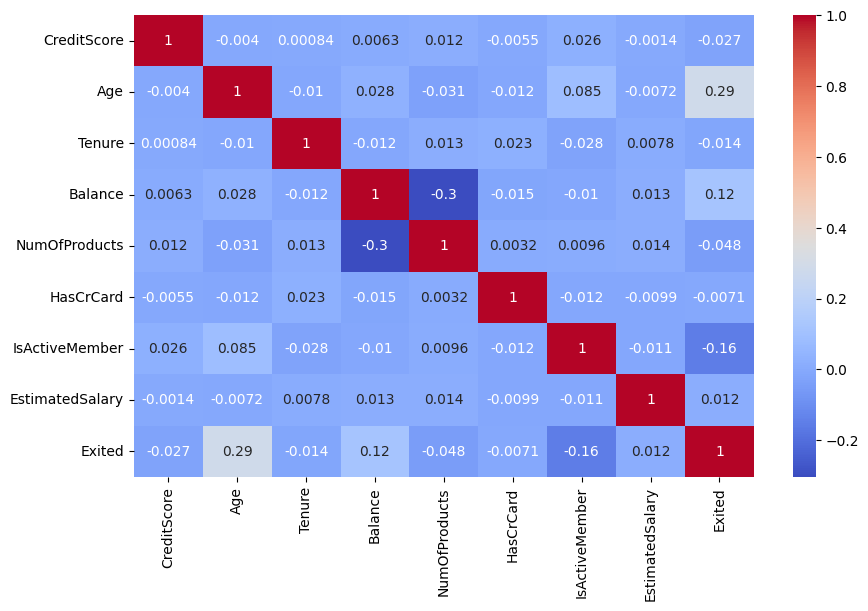

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),yticklabels=True,cbar=True,cmap='coolwarm',annot=True)
plt.show()


No two columns show a correlation greater than 0.75. So as theoretically suggested, we are good to go here.


### Transforming Estimated Salary Column (For EDA)

In [ ]:
conditions = [
    (df['EstimatedSalary'] <= 25000),
    (df['EstimatedSalary'] > 25000) & (df['EstimatedSalary'] <= 50000),
    (df['EstimatedSalary'] > 50000) & (df['EstimatedSalary'] <= 75000),
    (df['EstimatedSalary'] > 75000) & (df['EstimatedSalary'] <= 100000),
    (df['EstimatedSalary'] > 100000) & (df['EstimatedSalary'] <= 125000),
    (df['EstimatedSalary'] > 125000) & (df['EstimatedSalary'] <= 150000),
    (df['EstimatedSalary'] > 150000) & (df['EstimatedSalary'] <= 1750000),
    (df['EstimatedSalary'] > 175000) & (df['EstimatedSalary'] <= 200000)
]

values = ['Less than 25000', '25,000-50,000','50,000-75,000','75,000-100,000','100,000-125,000','125,000-150,000',
          '150,000-175,000','175,000-200,000'  ]

df['SalaryRange'] = np.select(conditions, values)


In [ ]:
df['SalaryRange'].value_counts()

150,000-175,000    2455
125,000-150,000    1279
100,000-125,000    1276
50,000-75,000      1269
75,000-100,000     1268
25,000-50,000      1236
Less than 25000    1217
Name: SalaryRange, dtype: int64

### Transforming Age Column (For EDA)

In [ ]:
conditions = [
    (df['Age'] >= 0) & (df['Age'] <= 18),
    (df['Age'] >= 18) & (df['Age'] < 30),
    (df['Age'] >= 30) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 50),
    (df['Age'] >= 50) & (df['Age'] < 60),
    (df['Age'] >= 60)
]

values = ['Minors', '18-30', '30-40','40-50','50-60','>60']

df['AgeGroup'] = np.select(conditions, values)

In [ ]:
df.AgeGroup.value_counts()

30-40     4346
40-50     2618
18-30     1619
50-60      869
>60        526
Minors      22
Name: AgeGroup, dtype: int64

# Univariate Analysis

<Figure size 3000x8000 with 0 Axes>

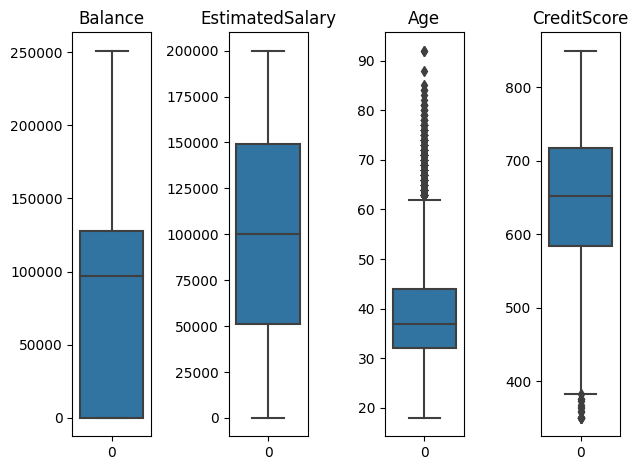

In [ ]:
plt.figure(figsize=(30, 80))
# Store the list of columns
columns_to_plot = ['Balance', 'EstimatedSalary', 'Age', 'CreditScore']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis) 
        axis.set_title(column)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Age column is Right skewed

df['Age'].skew()   

1.0113202630234552

In [ ]:
# Log transformation to handle right skewed data

df['Age1'] = np.log(df['Age']) 

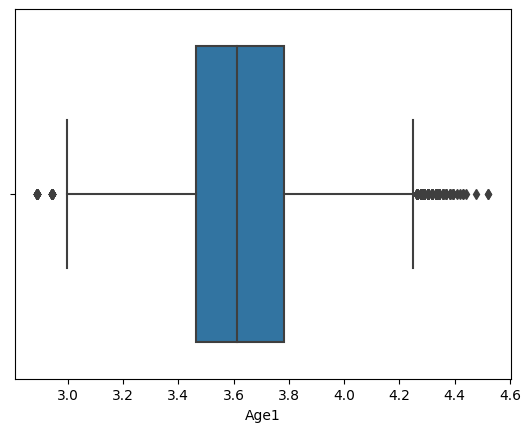

In [ ]:
# After log transformation

sns.boxplot(x=df['Age1'])
plt.show()

# Bivariate Analysis

#### Here our main interest is to get an understanding as to how the given attributes relate to the 'Exit' status.

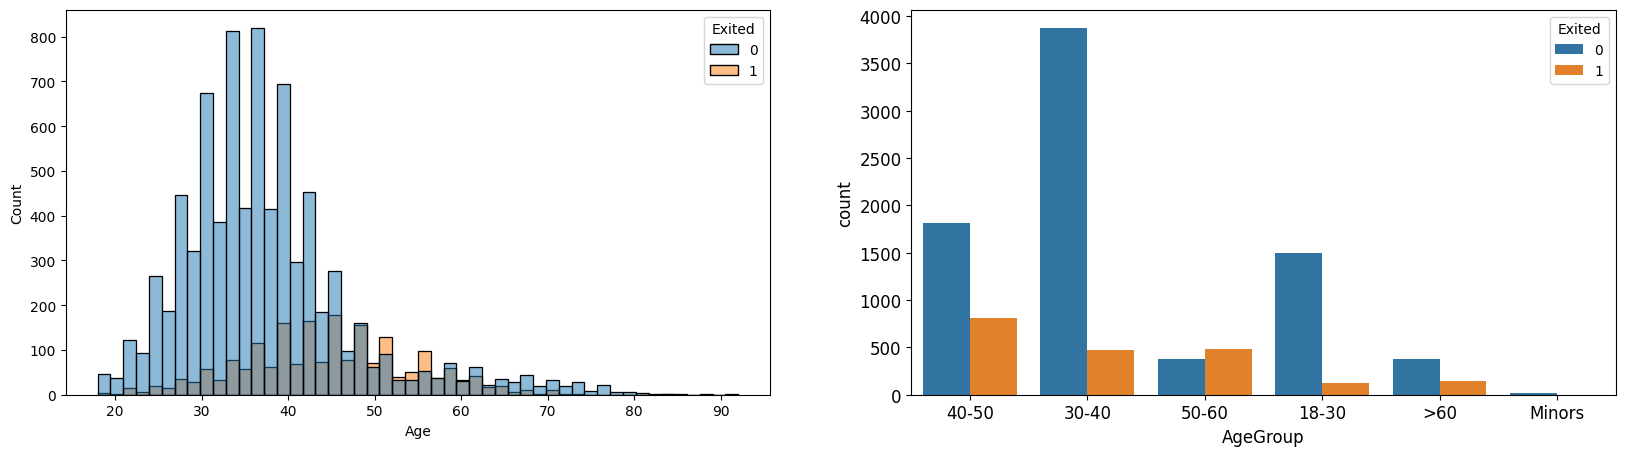

In [ ]:
fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Age',hue='Exited',bins=50,ax=axarr[0])

plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.countplot(data=df,x ='AgeGroup',hue='Exited',ax=axarr[1])

plt.show()

#### Our analysis reveals that the highest churn rate is observed in the age group of 40-50. Furthermore, for the age group of 50-60, the number of customers who churned is greater than those who were retained. Based on these findings, it may be necessary for the bank to review their target market and retention strategies across different age groups.

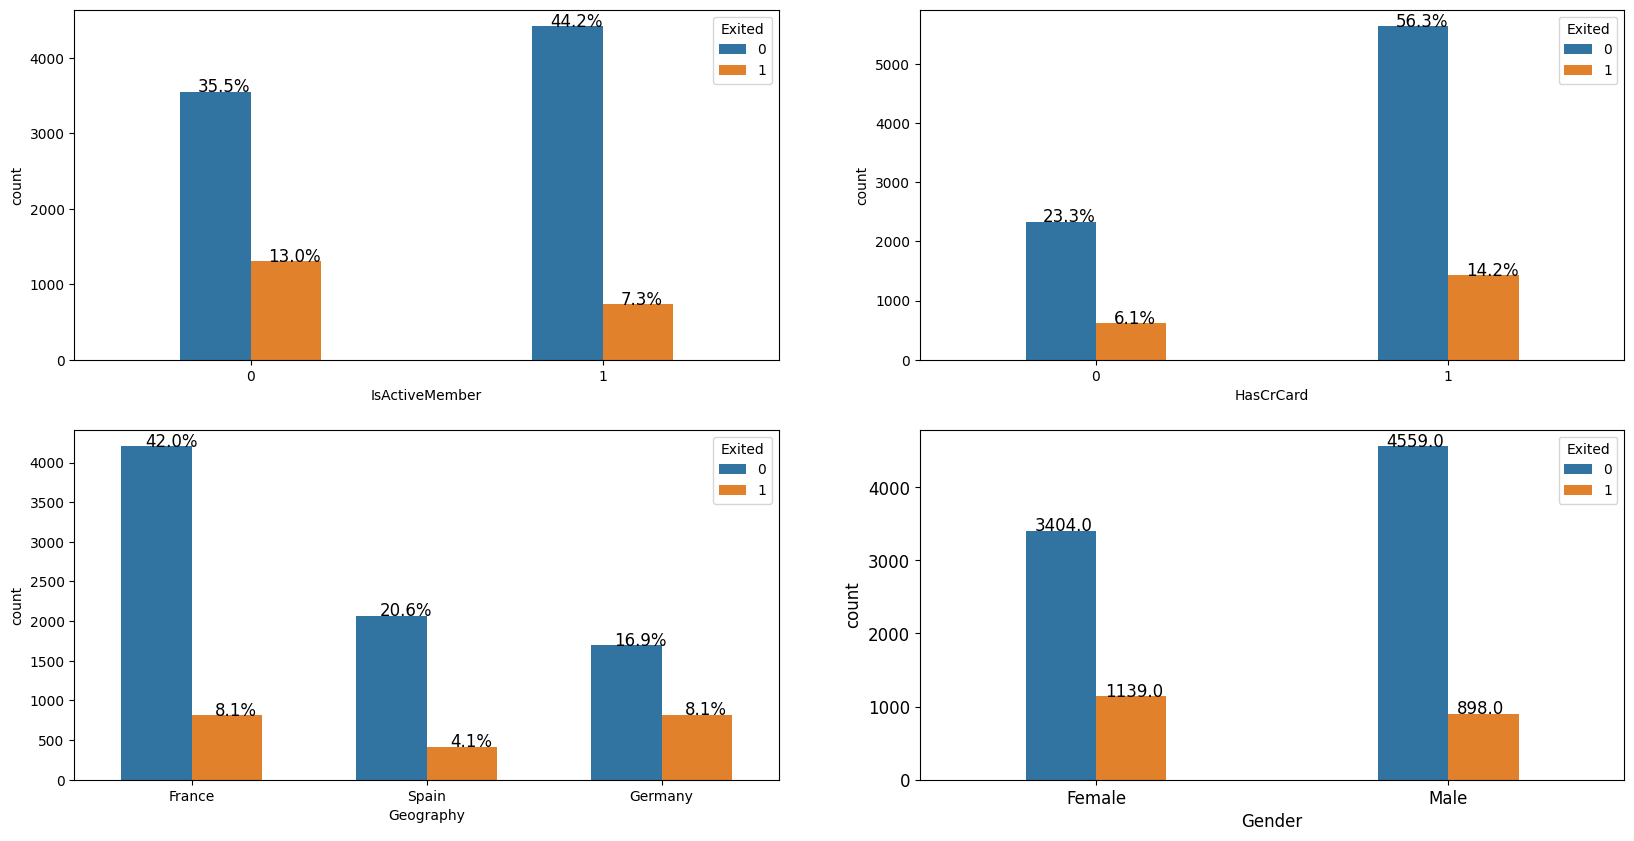

In [ ]:
fig, axarr = plt.subplots(2,2, figsize=(20, 10))

plt.xticks(size=12)
plt.xlabel('Is Active Member (Yes/No)',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='IsActiveMember',hue='Exited',width=0.4,ax=axarr[0][0])
total = len(df['IsActiveMember'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

plt.xticks(size=12)
plt.xlabel('Has Credit Card (Yes/No)',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)    
ax = sns.countplot(data=df,x='HasCrCard',hue='Exited',width=0.4,ax=axarr[0][1])    
total = len(df['HasCrCard'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

plt.xticks(size=12)
plt.xlabel('Geography',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='Geography',hue='Exited',width=0.6,ax=axarr[1][0])
total = len(df['Geography'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
    
plt.xticks(size=12)
plt.xlabel('Gender',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)  
ax = sns.countplot(data=df,x='Gender',hue='Exited',width=0.4,ax=axarr[1][1])
total = len(df['Gender'])
for p in ax.patches:
    value = '{:.1f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.075
    y = p.get_y() + p.get_height()
    ax.annotate(value, (x, y), size = 12)

plt.show()


Based on our analysis, we have identified the following insights:

* Non-active members are twice as likely to churn compared to active members. To address this, the bank may consider reaching out to inactive customers and providing them with special offers to encourage continued engagement.

* A majority of the customers who churned had credit cards, but given that most customers also have credit cards, this may be a coincidence.

* Nearly half of the customers are from France, followed by Spain and Germany with 25% each. Although the churn rate is highest in France, it's worth noting that Germany had a similar churn rate despite having a lower number of customers.

* The male-to-female ratio of customers is 5:4, and our analysis shows that female customers have a higher probability of churning compared to male customers."


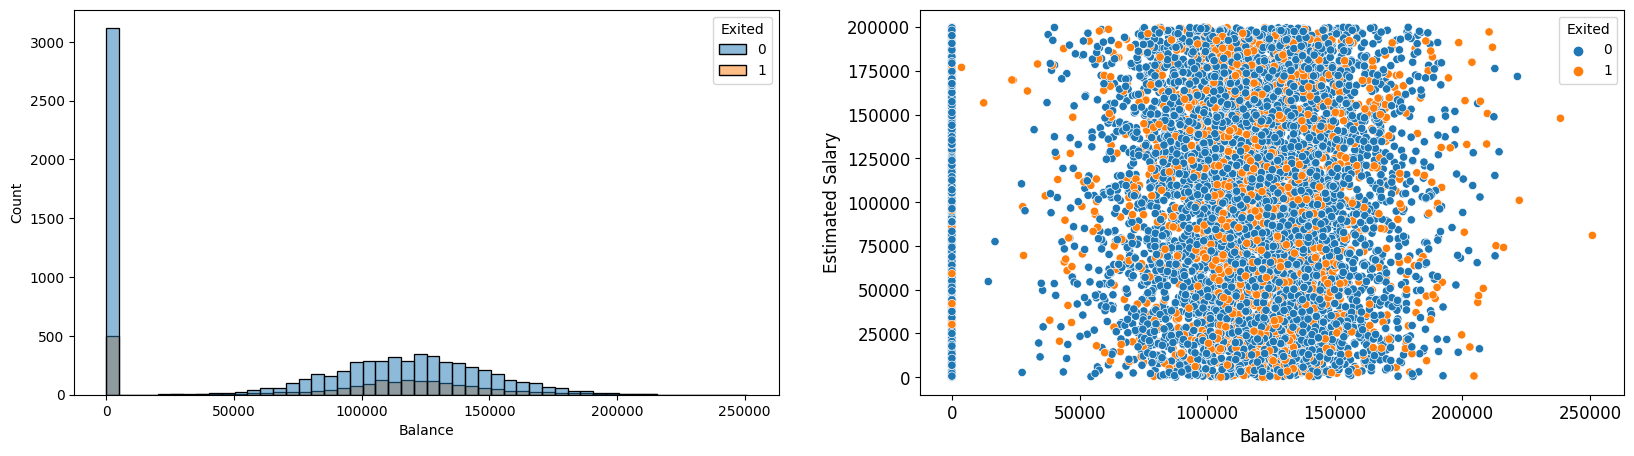

In [ ]:
fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Balance',hue='Exited',bins=50,ax = axarr[0])

plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Estimated Salary',size=12)
sns.scatterplot(data=df,x='Balance',y='EstimatedSalary',hue='Exited',ax=axarr[1])

plt.show()


#### Our analysis shows that the probability of customers with a zero balance account churning out is highest. We found that many customers maintain a zero balance account regardless of their estimated salary level.

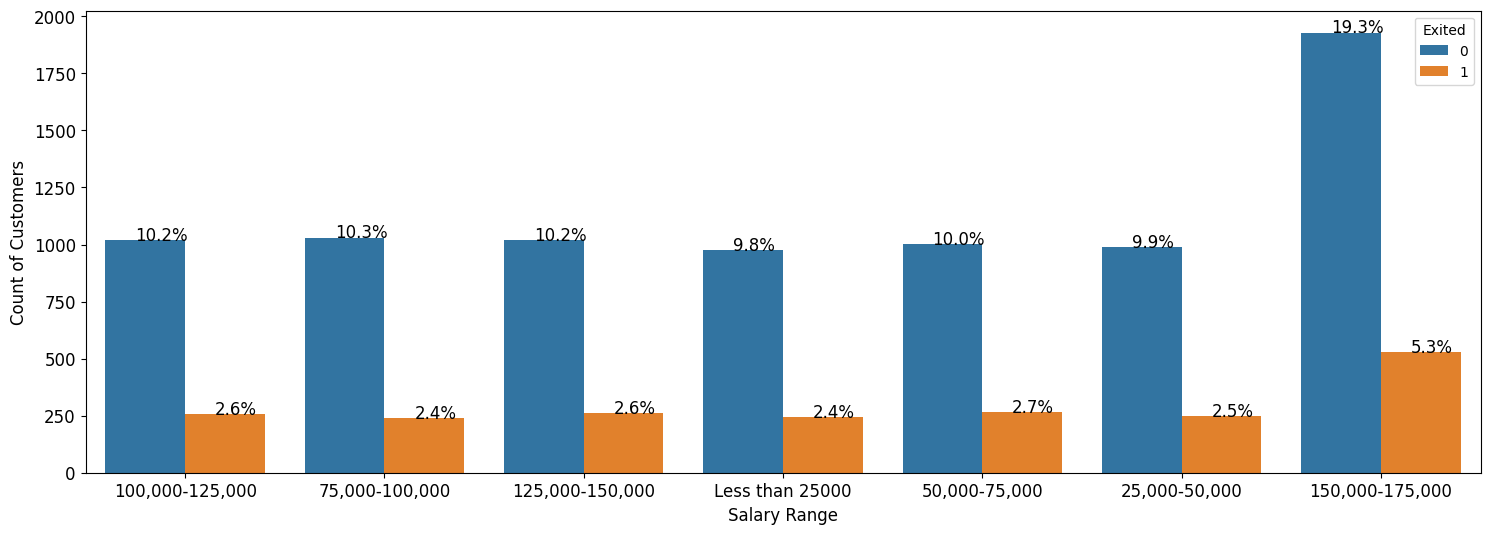

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='SalaryRange',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Salary Range',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
total = len(df['SalaryRange'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

plt.show()

#### Our analysis indicates that approximately one-fourth of the customers have a salary between 150000-175000, and we observed a higher churn rate for these customers. This suggests that the bank may be losing some of its valuable customers in this income bracket

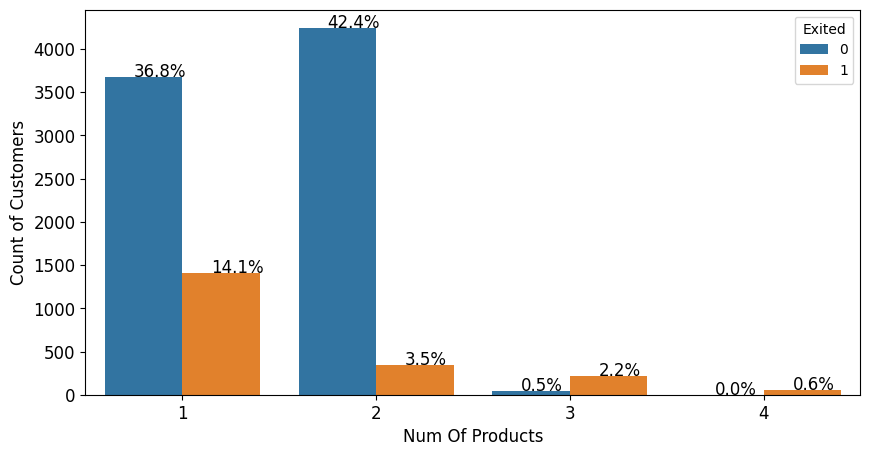

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df,x='NumOfProducts',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Num Of Products',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
total = len(df['NumOfProducts'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

plt.show()

#### Our analysis shows that the highest number of customers who churned out had only used one product, which accounted for 14% of the total customers. This suggests that the bank may need to focus on encouraging customers to use more of their services and products in order to improve customer retention.

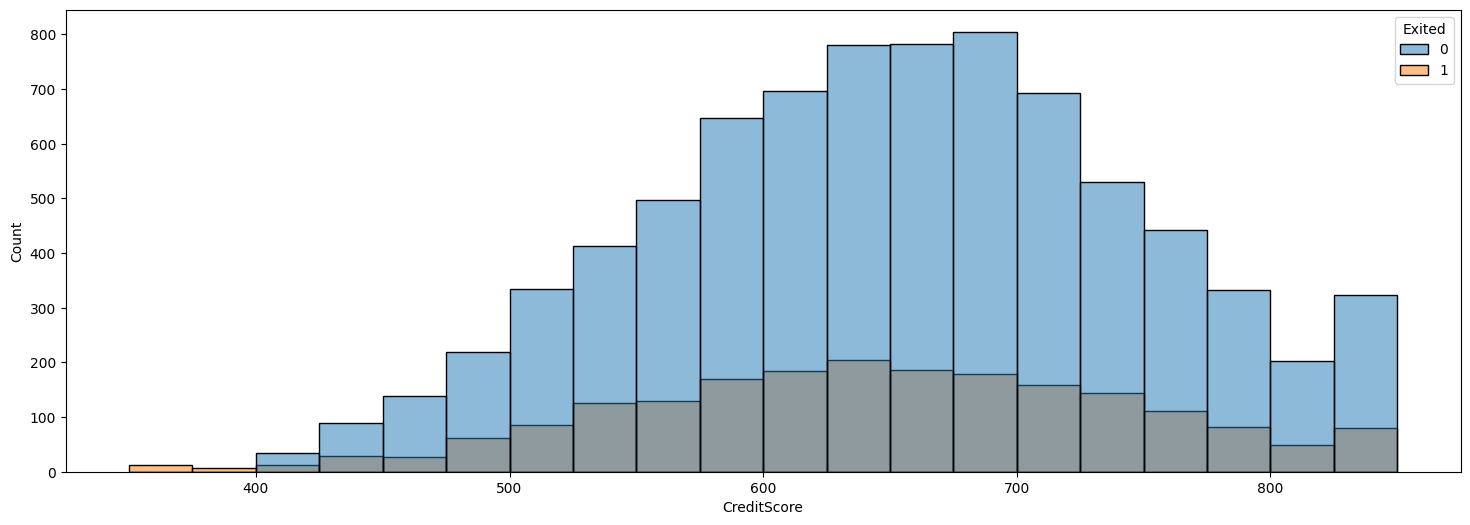

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=df,x='CreditScore',bins=20,hue='Exited')

plt.show()

#### There is no significant difference in the credit score distribution between retained and churned customers.

In [ ]:
# Drop the columns formed for EDA as they are no longer needed. Also drop age and keep logarithmic values instead(age1)

df.drop(columns=['SalaryRange','AgeGroup','Age'],inplace=True)

# Target check for balanced or Imbalanced data

In [ ]:
round(df['Exited'].value_counts()/len(df)*100,2)

0    79.63
1    20.37
Name: Exited, dtype: float64

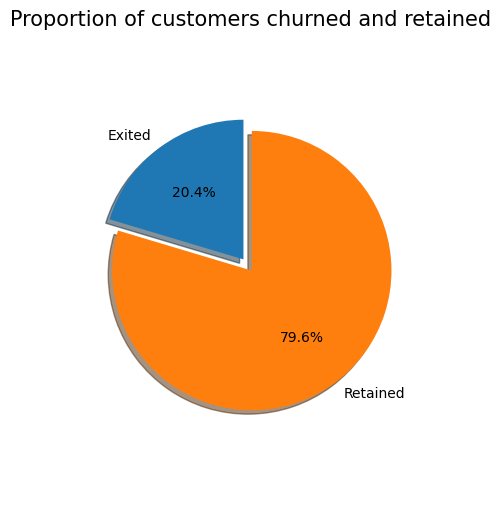

In [ ]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(4, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customers churned and retained", size = 15)
plt.show()


### Approximately 80% of the data belongs to the retained class, indicating that the data is imbalanced. To address this issue, we will using SMOTE (Synthetic Minority Over-sampling Technique) to balance the data and consider using the Precision-Recall curve instead of accuracy as the evaluation metric. We have decided not to use undersampling so that we can retain all the relevant information from the majority class.

# Predictive Behaviour Modeling

### Approximately 20% of the customers have churned, and it is crucial to the bank to accurately identify and retain this group rather than focusing on predicting the customers who remain. Therefore, it is important to ensure that the selected model accurately predicts this 20% of customers.

In [ ]:
#Import necessary packages for data preprocessing and model building.

from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

In [ ]:
# Split the dataset into training and testing sets with a test size of 20% and a random state of 52

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)
print("Shape of X_train:" ,x_train.shape)
print("Shape of X_test:" ,x_test.shape)

Shape of X_train: (8000, 10)
Shape of X_test: (2000, 10)


In [ ]:
unique, count = np.unique(y_train ,return_counts= True)
target_org_valuecount= {k:v for (k,v) in zip (unique,count)}
target_org_valuecount

{0: 6384, 1: 1616}

In [ ]:
x_test.head(3)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age1
8002,590,Spain,Male,1,0.00,2,0,0,133535.99,3.610918
5438,679,France,Male,7,160515.37,1,1,0,121904.14,3.526361
2369,648,Spain,Female,7,118241.02,1,1,0,172586.89,3.988984


In [ ]:
categorical_cols = ['Gender','Geography']

numerical_cols = ['Age1',
                  'Balance',
                  'NumOfProducts',
                  'HasCrCard',
                  'IsActiveMember',
                  'CreditScore',
                  'Tenure',
                  'EstimatedSalary']

## Encoding and Scaling

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=52)

# Pipeline (Logistic Model)

In [ ]:
logmodel=LogisticRegression()

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('logmodel', logmodel)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('logmodel', LogisticRegression())])

In [ ]:
y_predicted = pipe.predict(x_test)
y_predicted

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1579
           1       0.38      0.67      0.49       421

    accuracy                           0.70      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.78      0.70      0.73      2000



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as MSE

print("Training score: ",pipe.score(x_train, y_train))
print("Testing score: ",pipe.score(x_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


Training score:  0.713125
Testing score:  0.701
MSE score:  0.299
Accuracy: 0.70
Precision: 0.38
Recall: 0.67
F1-score: 0.49


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[1120,  459],
       [ 139,  282]])

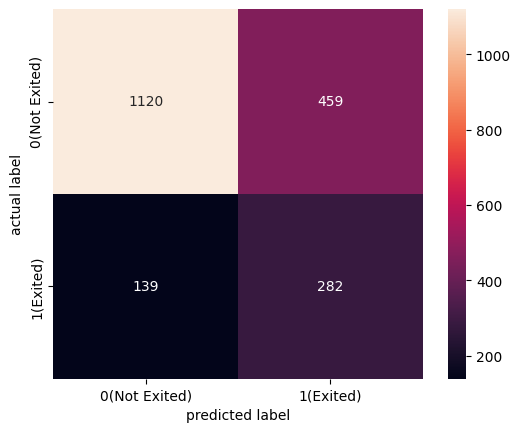

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted

array([0, 0, 1, ..., 0, 0, 1])

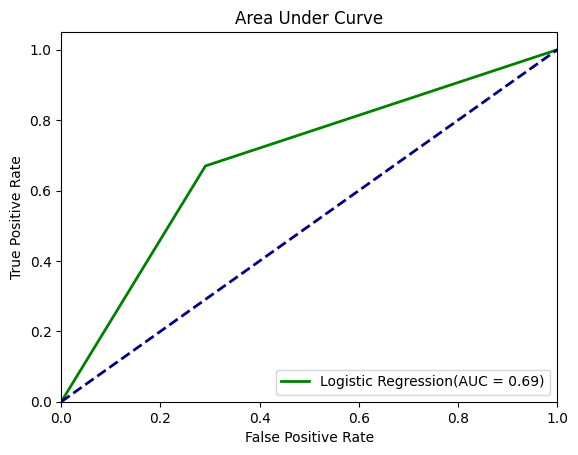

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

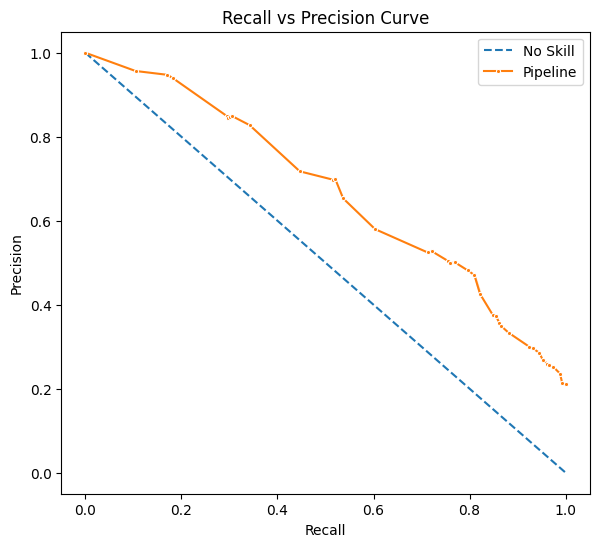

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve

yhat = pipe.predict_proba(x_test)
precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
plt.figure(dpi=100, figsize=(15, 6))
plt.subplot(121)
sns.lineplot(x=[0, 1], y=[1, 0], linestyle='--', label='No Skill')
sns.lineplot(x=recall, y=precision, marker='.', label=pipe.__class__.__name__)
plt.title("Recall vs Precision Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

In [ ]:
col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']

model_log_report1 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Logistic Regression'])

# Hyper Parameter Tuning for Decision Tree Using GridSearch CV

In [ ]:
x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

x_train['Gender'] = x_train['Gender'].replace({'Male':1,'Female':0})
x_train['Geography'] = x_train['Geography'].replace({'Germany':1,'France':0,'Spain':2})

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def dtree_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {'criterion': ['gini', 'entropy'], # measures split quality          
                   'max_features': ['auto', None], # features considered at splits
                   'max_depth': [5, 6, 8, 10,11],  # max nodes in each tree
                   'min_samples_leaf': [5,8, 10,12, 15], # samples required in each leaf
                   'min_samples_split': [5,10,15,20], # samples required to split node
                    } ]
    
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

In [ ]:
get_par = dtree_grid_search(x_train,y_train,10)
get_par

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 12,
 'min_samples_split': 5}

# Decision Tree Classifier

In [ ]:
x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=52, max_depth=6, criterion = "entropy",
                                   max_features= None,
                                   min_samples_split=15,
                                   min_samples_leaf=12)

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('decision_tree', decision_tree)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=12,
                                        min_samples_split=15,
                                        random_state=52))])

In [ ]:
y_predicted = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

print("Training score: ",pipe.score(x_train, y_train))
print("Testing score: ",pipe.score(x_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


Training score:  0.78875
Testing score:  0.7885
MSE score:  0.2115
Accuracy: 0.79
Precision: 0.5
Recall: 0.76
F1-score: 0.60


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted

array([0, 0, 1, ..., 1, 0, 1])

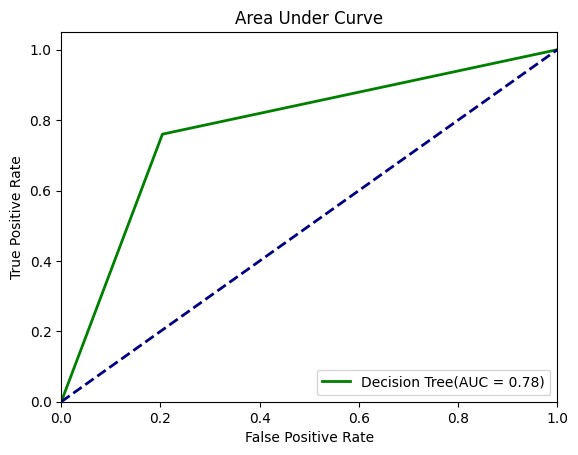

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")

plt.show()

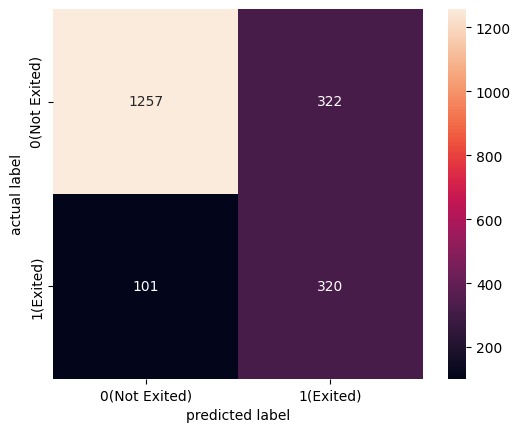

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()


In [ ]:
model_log_report2 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Decision Tree'])

# Hyper-parameter Tuning for Random Forest Using GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

x_train['Gender'] = x_train['Gender'].replace({'Male':1,'Female':0})
x_train['Geography'] = x_train['Geography'].replace({'Germany':1,'France':0,'Spain':2})

In [ ]:
def ran_for_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {'criterion': ['gini', 'entropy'], # measures split quality
                   'n_estimators': [50, 100, 200], # number trees to grow           
                   'max_depth': [6, 8, 10],  # max nodes in each tree
                   'min_samples_leaf': [5, 10, 15], # samples required in each leaf
                   'min_samples_split': [5,8,10], # samples required to split node
                    } ]
    
    # random forest model
    rfor_model=RandomForestClassifier()
    
    #use gridsearch to test all values
    rfor_gscv = GridSearchCV(rfor_model, param_grid, cv=nfolds)
    
    #fit model to data
    rfor_gscv.fit(X, y)
    
    return rfor_gscv.best_params_

In [ ]:
best_par = ran_for_grid_search(x_train,y_train,10)
best_par

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 200}

# Random Forest Classifier

In [ ]:
x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

In [ ]:
random_forest = RandomForestClassifier(max_depth=10,
                                       n_estimators = 50, random_state=52,
                                       bootstrap=True,
                                       max_features=None,
                                       min_samples_split=5,
                                       min_samples_leaf=5,
                                       criterion='gini')

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('random_forest', random_forest)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('random_forest',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        min_samples_leaf=5, min_samples_split=5,
                                        n_estimators=50, random_state=52))])

In [ ]:
y_predicted = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))
print("Testing score: ",pipe.score(x_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


Training score:  0.873375
Testing score:  0.8295
MSE score:  0.1705
Accuracy: 0.83
Precision: 0.58
Recall: 0.72
F1-score: 0.64


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted

array([0, 0, 1, ..., 1, 0, 1])

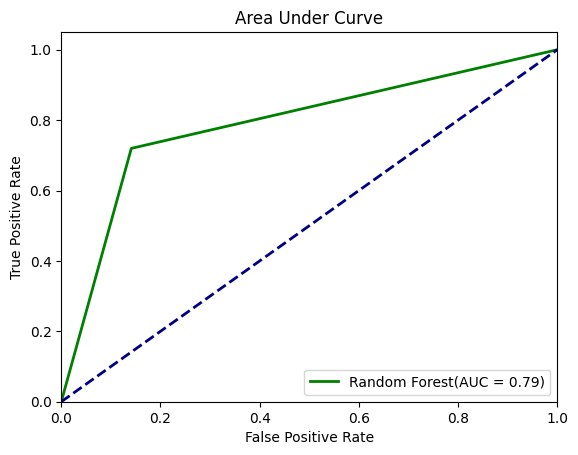

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

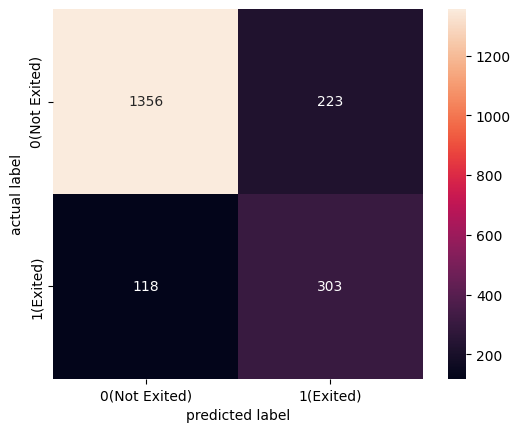

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
model_log_report3 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Random Forest'])

# Boosting Algorithms

## Hyper parameter tuning using GridSearch CV

In [ ]:
import xgboost as xgb

x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

x_train['Gender'] = x_train['Gender'].replace({'Male':1,'Female':0})
x_train['Geography'] = x_train['Geography'].replace({'Germany':1,'France':0,'Spain':2})

In [ ]:
def xgboost_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {
        'learning_rate': [0.01, 0.1, 0.2], # step size for model iteration
        'reg_lambda': [1, 2], # L2 regularization term; higher=more conservative
        'max_depth': [6, 8], # max number of trees deep
        'gamma': [2, 4], # minimum loss reduction on partitions; higher=more conservative
        'subsample': [0.6, 0.8], # ratio of the training used to grow each tree
        'colsample_bytree': [0.7, 0.9], # ratio of columns when constructing each tree
        'n_estimators': [100, 200,250], # number of trees to grow
                  } ]
    
    # XGboost model
    xgboost_model= xgb.XGBClassifier()
    
    #use gridsearch to test all values
    xgboost_gscv = GridSearchCV(xgboost_model, param_grid, cv=nfolds)
    
    #fit model to data
    xgboost_gscv.fit(X, y)
    
    return xgboost_gscv.best_params_

In [ ]:
best_par = xgboost_grid_search(x_train,y_train,10)
best_par

{'colsample_bytree': 0.7,
 'gamma': 4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100,
 'reg_lambda': 2,
 'subsample': 0.6}

# XG Boost

In [ ]:
x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)                                                    

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier(random_state=52, 
                        colsample_bytree= 0.7,
                        gamma= 4,
                        learning_rate= 0.1,
                        max_depth= 6,
                        n_estimators= 100,
                        reg_lambda= 1,
                        subsample= 0.8)

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('smote', smt),
                             ('xgb', xgb)
                         ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsampl...
                               feature_types=None, gamma=4, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=52, ...))])

In [ ]:
y_predicted = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

print("Training score: ",pipe.score(x_train, y_train))
print("Testing score: ",pipe.score(x_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training score:  0.878875
Testing score:  0.86
MSE score:  0.14
Accuracy: 0.86
Precision: 0.69
Recall: 0.60
F1-score: 0.64


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted

array([0, 0, 1, ..., 0, 0, 1])

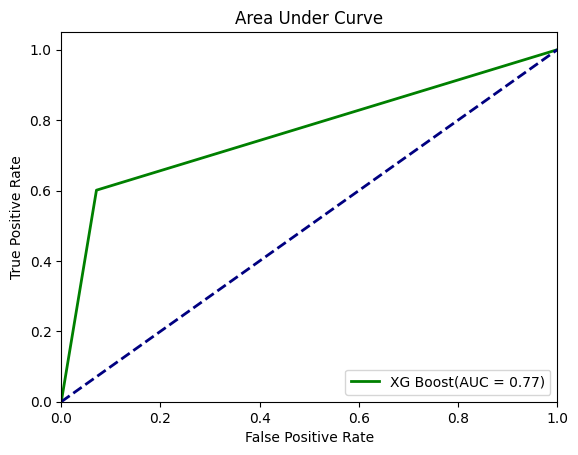

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='XG Boost(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

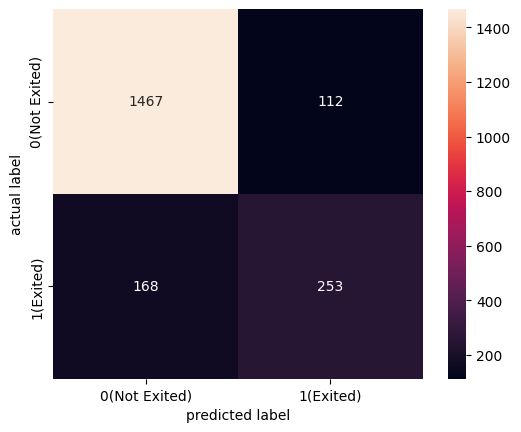

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
model_log_report4 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Xgboost'])

# Comparing Models

In [ ]:
col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']
model_comp = pd.DataFrame(columns=col)
model_comp = pd.concat((model_log_report1,model_log_report2,model_log_report3,model_log_report4))

In [ ]:
model_comp

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.79,0.79,0.21,0.79,0.50,0.76,0.60
Decision Tree,0.79,0.79,0.21,0.79,0.50,0.76,0.60
Random Forest,0.87,0.83,0.17,0.83,0.58,0.72,0.64
Xgboost,0.88,0.86,0.14,0.86,0.69,0.60,0.64


Based on the data provided, the following conclusions can be drawn:

* The logistic regression and decision tree models have the same performance, with training scores of 0.79 and testing scores of 0.79. However, the precision, recall, and F1-score of both models are relatively low at 0.50, 0.76, and 0.60, respectively. This indicates that both models may not be the best choice for this particular dataset.

* The random forest model outperforms the logistic regression and decision tree models, with a higher training score of 0.87 and a testing score of 0.83. The precision, recall, and F1-score of the random forest model are also higher than those of the logistic regression and decision tree models, indicating that this model may be a better choice for this dataset.

* The Xgboost model has the highest training score of 0.88 and the highest testing score of 0.86. Additionally, the model has the highest precision score of 0.69, indicating that the model is good at predicting true positives. However, the recall score of the Xgboost model is lower than that of the random forest model, indicating that it may be less effective at predicting true negatives.

* The MSE score is relatively low for all four models, indicating that the models are generally performing well in terms of predicting the target variable.

# RECOMENDATION

When deciding which model to choose, it is important to consider both the model performance and the computational resources required to train the model.

In this case, both the Random Forest and XGBoost models have similar testing scores, but the XGBoost model has a slightly higher precision score, indicating that it may be slightly better at predicting true positives. However, the XGBoost model consumed significantly more computational resources than the Random Forest model, with a time to process that was around 5 to 6 times longer.

Given these considerations, if computational resources are limited or time is a critical factor, it may be more practical to choose the Random Forest model over the XGBoost model, as it has a comparable performance while requiring significantly less computational resources.

---

Special thanks to MehakKhurana17 for their project that served as foundation for this work. I was able to replicate much of the initial analysis and make some enhancements to the exploratory data analysis. Furthermore, I conducted a more thorough comparative analysis of the different models and arrived to different conclusions drawn from the analysis.